***
# 4.02 Pandas DataFrames
- Pandas Documentation: https://pandas.pydata.org/

***
### Python 4.01. Series
### Python 4.02. Pandas DataFrame, Selection, and Indexing
### Python 4.03. Configuring Options, Data Type Conversion, Working with strings and dates, Missing Data
### Python 4.04. Groupby, Categorizing, and Labeling Data
### Python 4.05. Merging,Joining,and Concatenating
### Python 4.06. Pipe, Apply, Applymap, Map, Pivot Table, and Cotingency Table
### Python 4.07. Data Input and Output
### Python 4.08. Data Visualization
### Python 4.09. Exploratory Data Analysis and Beyond
### Python 4.10. Breakout Group Exercise and Solution
***

## Pandas - DataFrames

DataFrames are the **workhorse of Pandas** and are directly inspired by the R programming language. We can think of a DataFrame as **a bunch of Series objects put together to share the same index**. 

## Table of Contents

### 1. DataFrame() Function

### 2. Selection and Indexing

### 3. Conditional Selection

### 4. More Index Options (resetting, setting to something else, etc.)

### 5. Multi-Index and Index Hierarchy

***




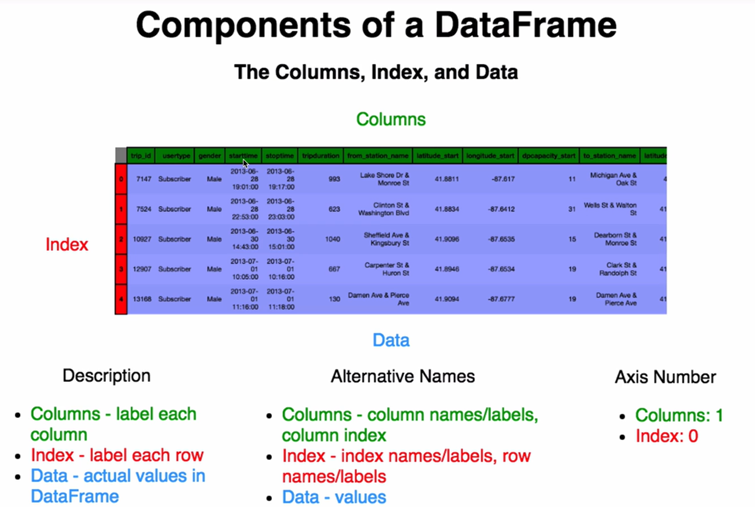

## 1. `DataFrame()` Function:

In [217]:
import pandas as pd
import numpy as np

In [218]:
from numpy.random import randn
np.random.seed(111)               # Make sure to get the same random numbers

In [219]:
data=randn(5,3)
data

array([[-1.13383833,  0.38431919,  1.49655378],
       [-0.3553823 , -0.78753354, -0.45943891],
       [-0.05916877, -0.3541735 , -0.73552305],
       [-1.18393989,  0.23889413, -0.58992026],
       [-1.44058512,  0.77370311, -1.02796733]])

In [220]:
index='A B C D E'.split()
index

['A', 'B', 'C', 'D', 'E']

In [221]:
columns='W X Y'.split()
columns

['W', 'X', 'Y']

In [222]:
df=pd.DataFrame(data,index,columns)
df

,W,X,Y
A,-1.133838,0.384319,1.496554
B,-0.355382,-0.787534,-0.459439
C,-0.059169,-0.354174,-0.735523
D,-1.183940,0.238894,-0.589920
E,-1.440585,0.773703,-1.027967


In [223]:
# Dataframe is a bunch of series sharing the same index
df = pd.DataFrame(data=randn(5,3),index='A B C D E'.split(),columns='W X Y'.split())
df

,W,X,Y
A,-0.090986,0.492003,0.424672
B,1.283049,0.315986,-0.408082
C,-0.067948,-0.952427,-0.110677
D,0.570594,0.915420,-1.669341
E,0.482714,-0.310473,2.394690


In [224]:
df1 = pd.DataFrame(data=randn(3,4),index=['Row1','Row2','Row3'],columns=['Col1','Col2','Col3', 'Col4'])
df1

,Col1,Col2,Col3,Col4
Row1,1.550931,-0.646465,-0.928937,-1.654976
Row2,0.350193,-0.141757,0.521082,-0.020901
Row3,-1.743844,-0.799159,-1.303570,0.178105


In [225]:
df2 = pd.DataFrame(randn(3,4),['Row1','Row2','Row3'],['Col1','Col2','Col3', 'Col4'])
df2

,Col1,Col2,Col3,Col4
Row1,-0.334402,-0.306027,-0.332406,1.962947
Row2,0.719242,1.142887,2.082877,-1.284648
Row3,0.538128,-0.044539,2.597164,-0.058266


#### Exercise: Create your own dataframe with index and column names

In [226]:
np.random.seed(112)
df2 = pd.DataFrame(randn(5,4),index='Row1 Row2 Row3 Row4 Row5'.split(),columns='Col1 Col2 Col3 Col4'.split())
df2

,Col1,Col2,Col3,Col4
Row1,1.477731,-1.315936,0.583513,0.485632
Row2,0.341551,0.591946,-0.699415,-0.270246
Row3,-0.507147,1.048893,1.273731,-0.543263
Row4,0.094720,-0.850640,-0.505122,-0.812732
Row5,-0.120981,-0.328018,0.714836,0.498457


In [227]:
# Exercise: 



In [228]:
# Example:
age = {"name":["Mei","Will","Sandy","Zoey"],
       "city":["Palatine","Champaign","Palatine","Palatine"],
       "age":[48,21,9,2]}

In [229]:
df3 = pd.DataFrame(age)
df3

,name,city,age
0,Mei,Palatine,48
1,Will,Champaign,21
2,Sandy,Palatine,9
3,Zoey,Palatine,2


In [230]:
type(df3["age"])

pandas.core.series.Series

In [231]:
type(df3[["age"]])

pandas.core.frame.DataFrame

In [232]:
df3.age

0    48
1    21
2     9
3     2
Name: age, dtype: int64

In [233]:
df3['name_age'] = df3['name'] + '_' + df3['age'].values.astype(str)
df3

,name,city,age,name_age
0,Mei,Palatine,48,Mei_48
1,Will,Champaign,21,Will_21
2,Sandy,Palatine,9,Sandy_9
3,Zoey,Palatine,2,Zoey_2


In [234]:
df3[df3['age']>=20]

,name,city,age,name_age
0,Mei,Palatine,48,Mei_48
1,Will,Champaign,21,Will_21


In [235]:
# Exercise: create a 3 X 4 dataframe with index and column names



## 2. Selection and Indexing

Let's learn the various methods to slice and dice data from a DataFrame

### 1). Selecting a column in a Data Frame

#### Method 1: Subset the data frame using column name:

example: `df2['ColName']`

#### Method 2: Use the column name as an attribute (like sql):

example: `df2.ColName`

In [236]:
df

,W,X,Y
A,-0.090986,0.492003,0.424672
B,1.283049,0.315986,-0.408082
C,-0.067948,-0.952427,-0.110677
D,0.570594,0.915420,-1.669341
E,0.482714,-0.310473,2.394690


In [237]:
# Pass a single column name to get a series
df['X']

A    0.492003
B    0.315986
C   -0.952427
D    0.915420
E   -0.310473
Name: X, dtype: float64

In [238]:
type(df)

pandas.core.frame.DataFrame

In [239]:
df['X']

A    0.492003
B    0.315986
C   -0.952427
D    0.915420
E   -0.310473
Name: X, dtype: float64

In [240]:
df[['X']] # get a dataframe due to the double brakets

,X
A,0.492003
B,0.315986
C,-0.952427
D,0.915420
E,-0.310473


In [241]:
type(df['X']), type(df[['X']])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [242]:
# Pass a list of column names to get another dataframe
df[['W','Y']]

,W,Y
A,-0.090986,0.424672
B,1.283049,-0.408082
C,-0.067948,-0.110677
D,0.570594,-1.669341
E,0.482714,2.394690


In [243]:
type(df)

pandas.core.frame.DataFrame

In [244]:
df['Y']

A    0.424672
B   -0.408082
C   -0.110677
D   -1.669341
E    2.394690
Name: Y, dtype: float64

In [245]:
type(df['Y'])

pandas.core.series.Series

In [246]:
# SQL Syntax - try to avoid mixing with various method notations
df.Y

A    0.424672
B   -0.408082
C   -0.110677
D   -1.669341
E    2.394690
Name: Y, dtype: float64

In [247]:
type(df.Y)

pandas.core.series.Series

In [248]:
(df.Y).dtype

dtype('float64')

### DataFrame Columns are just Series

In [249]:
type(df['W'])

pandas.core.series.Series

In [250]:
df['W'].dtype

dtype('float64')

In [251]:
df

,W,X,Y
A,-0.090986,0.492003,0.424672
B,1.283049,0.315986,-0.408082
C,-0.067948,-0.952427,-0.110677
D,0.570594,0.915420,-1.669341
E,0.482714,-0.310473,2.394690


### Creating a New Column

In [252]:
df['Z'] = df['W'] + df['Y']

In [253]:
df['Z']

A    0.333686
B    0.874967
C   -0.178625
D   -1.098746
E    2.877403
Name: Z, dtype: float64

In [254]:
df

,W,X,Y,Z
A,-0.090986,0.492003,0.424672,0.333686
B,1.283049,0.315986,-0.408082,0.874967
C,-0.067948,-0.952427,-0.110677,-0.178625
D,0.570594,0.915420,-1.669341,-1.098746
E,0.482714,-0.310473,2.394690,2.877403


### Removing Columns

In [255]:
df.drop('X')

KeyError: "['X'] not found in axis"

In [256]:
new_table = df.drop('X', axis=1)
new_table

,W,Y,Z
A,-0.090986,0.424672,0.333686
B,1.283049,-0.408082,0.874967
C,-0.067948,-0.110677,-0.178625
D,0.570594,-1.669341,-1.098746
E,0.482714,2.394690,2.877403


In [257]:
# Not inplace unless specified
df

,W,X,Y,Z
A,-0.090986,0.492003,0.424672,0.333686
B,1.283049,0.315986,-0.408082,0.874967
C,-0.067948,-0.952427,-0.110677,-0.178625
D,0.570594,0.915420,-1.669341,-1.098746
E,0.482714,-0.310473,2.394690,2.877403


In [258]:
df.drop('X',axis=1,inplace=True)

In [259]:
df

,W,Y,Z
A,-0.090986,0.424672,0.333686
B,1.283049,-0.408082,0.874967
C,-0.067948,-0.110677,-0.178625
D,0.570594,-1.669341,-1.098746
E,0.482714,2.394690,2.877403


Can also drop rows this way:

In [260]:
df.drop('E',axis=0)  # axis=0 refers to index and it is default

,W,Y,Z
A,-0.090986,0.424672,0.333686
B,1.283049,-0.408082,0.874967
C,-0.067948,-0.110677,-0.178625
D,0.570594,-1.669341,-1.098746


In [261]:
df

,W,Y,Z
A,-0.090986,0.424672,0.333686
B,1.283049,-0.408082,0.874967
C,-0.067948,-0.110677,-0.178625
D,0.570594,-1.669341,-1.098746
E,0.482714,2.394690,2.877403


In [262]:
df.drop('E')

,W,Y,Z
A,-0.090986,0.424672,0.333686
B,1.283049,-0.408082,0.874967
C,-0.067948,-0.110677,-0.178625
D,0.570594,-1.669341,-1.098746


In [263]:
df.drop('E',axis=0,inplace=True)
df

,W,Y,Z
A,-0.090986,0.424672,0.333686
B,1.283049,-0.408082,0.874967
C,-0.067948,-0.110677,-0.178625
D,0.570594,-1.669341,-1.098746


In [264]:
df

,W,Y,Z
A,-0.090986,0.424672,0.333686
B,1.283049,-0.408082,0.874967
C,-0.067948,-0.110677,-0.178625
D,0.570594,-1.669341,-1.098746


In [265]:
del df['W']
df

,Y,Z
A,0.424672,0.333686
B,-0.408082,0.874967
C,-0.110677,-0.178625
D,-1.669341,-1.098746


### 2). Selecting Rows

#### If we need to select a range of rows, we can specify the range using  "`:`" 

In [266]:
df

,Y,Z
A,0.424672,0.333686
B,-0.408082,0.874967
C,-0.110677,-0.178625
D,-1.669341,-1.098746


In [267]:
df[0:3]

,Y,Z
A,0.424672,0.333686
B,-0.408082,0.874967
C,-0.110677,-0.178625


#### If we need to select a range of rows, using their labels we can use method `loc` or `iloc`:
`loc` - label index based method

`iloc` - numeric index position based method - `i`: `indexing`

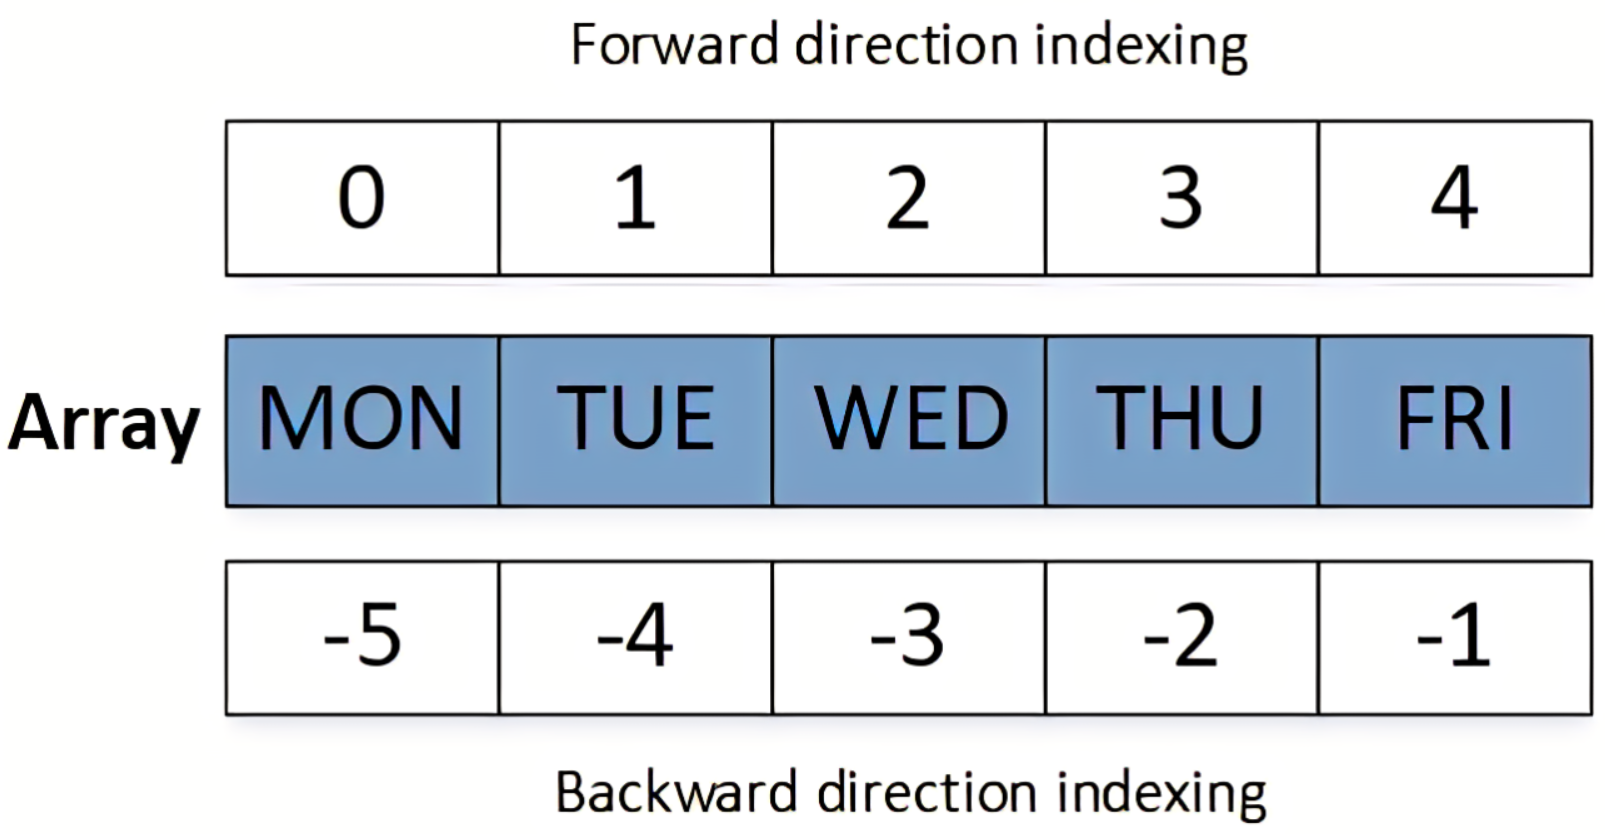

In [268]:
df.loc['A']  # rows are series too - label based selection

Y    0.424672
Z    0.333686
Name: A, dtype: float64

Or select based off of position instead of label 

In [269]:
df.iloc[0]  # Integer based selection

Y    0.424672
Z    0.333686
Name: A, dtype: float64

### 3). Selecting Subset of Rows and Columns

`df.loc[row1,col1]`

`df.loc[[row1,row2],[col1,col2]]`

`df.iloc[rown1:rown2]`

`df.iloc[rown1:rown2,coln1:coln2]`

In [270]:
df = pd.DataFrame(data=randn(5,3),index='A B C D E'.split(),columns='W X Y'.split())
df

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [271]:
df.columns

Index(['W', 'X', 'Y'], dtype='object')

In [272]:
df.loc['B','Y']

0.01915627861439648

In [273]:
df.loc[['A','C'],['X','Y']]

,X,Y
A,0.597144,-0.025326
C,0.946807,0.680366


In [274]:
df.iloc[0:2,1:3]

,X,Y
A,0.597144,-0.025326
B,1.600345,0.019156


In [275]:
df

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [276]:
df.iloc[0:2,:]

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156


In [277]:
df.shape

(5, 3)

## 3. Conditional Selection

An important feature of Pandas is conditional selection using **bracket notation**, very similar to Numpy:

In [278]:
df

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [279]:
booldf=df > 0

In [280]:
booldf

,W,X,Y
A,False,True,False
B,True,True,True
C,True,True,True
D,False,True,False
E,False,False,True


In [281]:
df[booldf]

,W,X,Y
A,NaN,0.597144,NaN
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,NaN,0.182188,NaN
E,NaN,NaN,2.199807


In [282]:
df[df > 0]

,W,X,Y
A,NaN,0.597144,NaN
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,NaN,0.182188,NaN
E,NaN,NaN,2.199807


In [283]:
df['X']>0

A     True
B     True
C     True
D     True
E    False
Name: X, dtype: bool

In [284]:
df['X']<0

A    False
B    False
C    False
D    False
E     True
Name: X, dtype: bool

In [285]:
df[df['X']<0]

,W,X,Y
E,-1.485238,-0.415799,2.199807


In [286]:
df['X']>0

A     True
B     True
C     True
D     True
E    False
Name: X, dtype: bool

In [287]:
df

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [288]:
df[df['X']>0]

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900


In [289]:
df['X']>0

A     True
B     True
C     True
D     True
E    False
Name: X, dtype: bool

In [290]:
df[df['X']>0]['Y']

A   -0.025326
B    0.019156
C    0.680366
D   -0.697900
Name: Y, dtype: float64

In [291]:
df[df['X']>0][['Y','X']]

,Y,X
A,-0.025326,0.597144
B,0.019156,1.600345
C,0.680366,0.946807
D,-0.697900,0.182188


In [292]:
boolseries = df['X']>0
boolseries

A     True
B     True
C     True
D     True
E    False
Name: X, dtype: bool

In [293]:
output = df[boolseries]
output

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900


In [294]:
columns = ['Y','X']
columns

['Y', 'X']

In [295]:
output[columns]

,Y,X
A,-0.025326,0.597144
B,0.019156,1.600345
C,0.680366,0.946807
D,-0.697900,0.182188


In [296]:
boolseries = df['X']>0
output = df[boolseries]
columns = ['Y','X']
output[columns]

,Y,X
A,-0.025326,0.597144
B,0.019156,1.600345
C,0.680366,0.946807
D,-0.697900,0.182188


In [297]:
df

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [298]:
# Exercise: use df dataframe to pull indexs/rows 'C' and 'D' and columns 'W' and 'Y'



For two conditions you can use `| (or)` and `& (and)` with parenthesis:

In [299]:
df[(df['Y']>0)]

,W,X,Y
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
E,-1.485238,-0.415799,2.199807


In [300]:
df[(df['Y'] > -1)]

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [301]:
df

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [302]:
df[(df['X']>0) and (df['Y'] > -1)]  # "and" can only take a single boolean value instead of a series of boolean values

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [303]:
df[(df['X']>0) & (df['Y'] > -1)]

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900


In [304]:
df[(df['X']>0) or (df['Y'] > 1)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [305]:
df[(df['X']>0) | (df['Y'] > 1)]

,W,X,Y
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [306]:
df.rename(columns={'X':'Col1','Y':'Col2','Z':'Col3'},inplace=True)
df

,W,Col1,Col2
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


#### Pandas `where()` method is used to check a data frame for one or more condition and return the result accordingly. 
- By default, The rows not satisfying the condition are filled with NaN value.

**Syntax**:
DataFrame.where(cond, other=nan, inplace=False, axis=None, level=None, errors=’raise’, try_cast=False, raise_on_error=None)

In [307]:
%pwd

'C:\\Users\\yumei\\CSP Workshop 2023'

#### Example 1: Single Condition operation

In this example, rows having particular Team name will be shown and rest will be replaced by NaN using .where() method.

In [309]:
# importing pandas package
import pandas as pd
  
# making data frame from csv file
data = pd.read_csv('C:\\Users\\yumei\\CSP Workshop 2023\\Data\\nba.csv')
  
# sorting dataframe
data.sort_values("Team", inplace = True)
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
317,Lamar Patterson,Atlanta Hawks,13,SG,24,5-Jun,225,Pittsburgh,525093.0
309,Kent Bazemore,Atlanta Hawks,24,SF,26,5-Jun,201,Old Dominion,2000000.0
310,Tim Hardaway Jr.,Atlanta Hawks,10,SG,24,6-Jun,205,Michigan,1304520.0
311,Kirk Hinrich,Atlanta Hawks,12,SG,35,4-Jun,190,Kansas,2854940.0
312,Al Horford,Atlanta Hawks,15,C,30,10-Jun,245,Florida,12000000.0
...,...,...,...,...,...,...,...,...,...
371,Jarell Eddie,Washington Wizards,8,SG,24,7-Jun,218,Virginia Tech,561716.0
369,Bradley Beal,Washington Wizards,3,SG,22,5-Jun,207,Florida,5694674.0
368,Alan Anderson,Washington Wizards,6,SG,33,6-Jun,220,Michigan State,4000000.0
382,John Wall,Washington Wizards,2,PG,25,4-Jun,195,Kentucky,15851950.0


In [310]:
# making boolean series for a team name
filter1 = data["Team"]=="Atlanta Hawks"
  
# filtering data
data2=data.where(filter1).dropna()
data2

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
317,Lamar Patterson,Atlanta Hawks,13.0,SG,24.0,5-Jun,225.0,Pittsburgh,525093.0
309,Kent Bazemore,Atlanta Hawks,24.0,SF,26.0,5-Jun,201.0,Old Dominion,2000000.0
310,Tim Hardaway Jr.,Atlanta Hawks,10.0,SG,24.0,6-Jun,205.0,Michigan,1304520.0
311,Kirk Hinrich,Atlanta Hawks,12.0,SG,35.0,4-Jun,190.0,Kansas,2854940.0
312,Al Horford,Atlanta Hawks,15.0,C,30.0,10-Jun,245.0,Florida,12000000.0
313,Kris Humphries,Atlanta Hawks,43.0,PF,31.0,9-Jun,235.0,Minnesota,1000000.0
314,Kyle Korver,Atlanta Hawks,26.0,SG,35.0,7-Jun,212.0,Creighton,5746479.0
315,Paul Millsap,Atlanta Hawks,4.0,PF,31.0,8-Jun,246.0,Louisiana Tech,18671659.0
316,Mike Muscala,Atlanta Hawks,31.0,PF,24.0,11-Jun,240.0,Bucknell,947276.0
319,Mike Scott,Atlanta Hawks,32.0,PF,27.0,8-Jun,237.0,Virginia,3333333.0


#### Example 2: Multi-condition Operations

Data is filtered on the basis of both Team and Age. Only the rows having Team name “Atlanta Hawks” and players having age above 24 will be displayed.

In [311]:
# making boolean series for a team name
filter1 = data["Team"]=="Atlanta Hawks"
  
# making boolean series for age
filter2 = data["Age"]>24
  
# filtering data on basis of both filters
data2=data.where(filter1 & filter2).dropna()
data2

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
309,Kent Bazemore,Atlanta Hawks,24.0,SF,26.0,5-Jun,201.0,Old Dominion,2000000.0
311,Kirk Hinrich,Atlanta Hawks,12.0,SG,35.0,4-Jun,190.0,Kansas,2854940.0
312,Al Horford,Atlanta Hawks,15.0,C,30.0,10-Jun,245.0,Florida,12000000.0
313,Kris Humphries,Atlanta Hawks,43.0,PF,31.0,9-Jun,235.0,Minnesota,1000000.0
314,Kyle Korver,Atlanta Hawks,26.0,SG,35.0,7-Jun,212.0,Creighton,5746479.0
315,Paul Millsap,Atlanta Hawks,4.0,PF,31.0,8-Jun,246.0,Louisiana Tech,18671659.0
319,Mike Scott,Atlanta Hawks,32.0,PF,27.0,8-Jun,237.0,Virginia,3333333.0
323,Jeff Teague,Atlanta Hawks,0.0,PG,27.0,2-Jun,186.0,Wake Forest,8000000.0


In [312]:
import numpy as np
data[data['Name']!=np.isnan]


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
317,Lamar Patterson,Atlanta Hawks,13,SG,24,5-Jun,225,Pittsburgh,525093.0
309,Kent Bazemore,Atlanta Hawks,24,SF,26,5-Jun,201,Old Dominion,2000000.0
310,Tim Hardaway Jr.,Atlanta Hawks,10,SG,24,6-Jun,205,Michigan,1304520.0
311,Kirk Hinrich,Atlanta Hawks,12,SG,35,4-Jun,190,Kansas,2854940.0
312,Al Horford,Atlanta Hawks,15,C,30,10-Jun,245,Florida,12000000.0
...,...,...,...,...,...,...,...,...,...
371,Jarell Eddie,Washington Wizards,8,SG,24,7-Jun,218,Virginia Tech,561716.0
369,Bradley Beal,Washington Wizards,3,SG,22,5-Jun,207,Florida,5694674.0
368,Alan Anderson,Washington Wizards,6,SG,33,6-Jun,220,Michigan State,4000000.0
382,John Wall,Washington Wizards,2,PG,25,4-Jun,195,Kentucky,15851950.0


## 4. More Index Options (resetting, setting to something else, etc.)

Let's discuss some more features of indexing, including resetting the index or setting it to something else. We'll also talk about index hierarchy.

In [313]:
df

,W,Col1,Col2
A,-0.888746,0.597144,-0.025326
B,0.109823,1.600345,0.019156
C,1.143787,0.946807,0.680366
D,-0.739212,0.182188,-0.697900
E,-1.485238,-0.415799,2.199807


In [314]:
# Reset to default 0,1...n index and the current index reset to a column
df.reset_index()

,index,W,Col1,Col2
0,A,-0.888746,0.597144,-0.025326
1,B,0.109823,1.600345,0.019156
2,C,1.143787,0.946807,0.680366
3,D,-0.739212,0.182188,-0.697900
4,E,-1.485238,-0.415799,2.199807


In [315]:
df.set_index('W')

,Col1,Col2
W,,
-0.888746,0.597144,-0.025326
0.109823,1.600345,0.019156
1.143787,0.946807,0.680366
-0.739212,0.182188,-0.697900
-1.485238,-0.415799,2.199807


In [316]:
# df.reset_index(inplace = True)

In [317]:
newindex = 'CA NY WY OR IL'.split()

In [318]:
newindex

['CA', 'NY', 'WY', 'OR', 'IL']

In [319]:
df['States'] = newindex
df

,W,Col1,Col2,States
A,-0.888746,0.597144,-0.025326,CA
B,0.109823,1.600345,0.019156,NY
C,1.143787,0.946807,0.680366,WY
D,-0.739212,0.182188,-0.697900,OR
E,-1.485238,-0.415799,2.199807,IL


In [320]:
df.set_index('States')  # new index will overwrite your current index

,W,Col1,Col2
States,,,
CA,-0.888746,0.597144,-0.025326
NY,0.109823,1.600345,0.019156
WY,1.143787,0.946807,0.680366
OR,-0.739212,0.182188,-0.697900
IL,-1.485238,-0.415799,2.199807


In [321]:
df

,W,Col1,Col2,States
A,-0.888746,0.597144,-0.025326,CA
B,0.109823,1.600345,0.019156,NY
C,1.143787,0.946807,0.680366,WY
D,-0.739212,0.182188,-0.697900,OR
E,-1.485238,-0.415799,2.199807,IL


In [322]:
df.set_index('States',inplace=True)

In [323]:
df

,W,Col1,Col2
States,,,
CA,-0.888746,0.597144,-0.025326
NY,0.109823,1.600345,0.019156
WY,1.143787,0.946807,0.680366
OR,-0.739212,0.182188,-0.697900
IL,-1.485238,-0.415799,2.199807


## 5. Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [324]:
# zip() method takes iterable or containers and returns a single iterator object, having mapped values from all the containers.
# It is used to map the similar index of multiple containers so that they can be used just using a single entity.
name = [ "Manjeet", "Nikhil", "Shambhavi", "Astha" ]
roll_no = [ 4, 1, 3, 2 ]
# using zip() to map values
mapped = zip(name, roll_no)
print(set(mapped))

{('Nikhil', 1), ('Manjeet', 4), ('Shambhavi', 3), ('Astha', 2)}


In [325]:
# Index Levels
outside = ['Group1','Group1','Group1','Group2','Group2','Group2']
inside = [1,2,3,1,2,3]
hier_index = zip(outside,inside)
hier_index

In [326]:
hier_index = list(zip(outside,inside))  # make a tuple pairs
hier_index

[('Group1', 1),
 ('Group1', 2),
 ('Group1', 3),
 ('Group2', 1),
 ('Group2', 2),
 ('Group2', 3)]

In [327]:
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex([('Group1', 1),
            ('Group1', 2),
            ('Group1', 3),
            ('Group2', 1),
            ('Group2', 2),
            ('Group2', 3)],
           )

In [328]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['X','Y'])
df

X         Y
Group1 1  1.402524 -1.190561
       2  0.165657 -0.829552
       3  0.281348 -0.010144
Group2 1 -1.020805  0.203030
       2 -0.052027 -0.283686
       3  0.137946 -0.310374

Let's show how to index this. For index hierarchy we use `df.loc[]`, if this was on the columns axis, you would just use normal bracket notation `df[]`. Calling one level of the index returns the sub-dataframe:

In [329]:
df.loc['Group2']

,X,Y
1,-1.020805,0.203030
2,-0.052027,-0.283686
3,0.137946,-0.310374


In [330]:
df.loc['Group1'].loc[1]

X    1.402524
Y   -1.190561
Name: 1, dtype: float64

In [331]:
df.loc['Group1'].iloc[0]

X    1.402524
Y   -1.190561
Name: 1, dtype: float64

In [332]:
df.index.names

FrozenList([None, None])

In [333]:
df.index.names = ['Groups','Num']

In [334]:
df

X         Y
Groups Num                    
Group1 1    1.402524 -1.190561
       2    0.165657 -0.829552
       3    0.281348 -0.010144
Group2 1   -1.020805  0.203030
       2   -0.052027 -0.283686
       3    0.137946 -0.310374

In [335]:
df.loc['Group1'].loc[1]['X']

1.4025238169534475

In [336]:
# Exercise: index df to grab 0.203030



In [337]:
df.loc['Group1']

,X,Y
Num,,
1,1.402524,-1.190561
2,0.165657,-0.829552
3,0.281348,-0.010144


In [338]:
df.xs('Group2')  # cross-section with multiple level index

,X,Y
Num,,
1,-1.020805,0.203030
2,-0.052027,-0.283686
3,0.137946,-0.310374


In [339]:
df

X         Y
Groups Num                    
Group1 1    1.402524 -1.190561
       2    0.165657 -0.829552
       3    0.281348 -0.010144
Group2 1   -1.020805  0.203030
       2   -0.052027 -0.283686
       3    0.137946 -0.310374

In [340]:
df.xs(['Group1',1])

C:\Users\yumei\AppData\Local\Temp/ipykernel_73472/1916224209.py:1: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df.xs(['Group1',1])


X    1.402524
Y   -1.190561
Name: (Group1, 1), dtype: float64

In [341]:
df.xs(1,level='Num')

,X,Y
Groups,,
Group1,1.402524,-1.190561
Group2,-1.020805,0.203030


#### Note: The course materials are developed mainly based on personal experience and contributions from the Python learning community
Referred Books: 
- Learning Python, 5th Edition by Mark Lutz
- Python Data Science Handbook, Jake, VanderPlas
- Python for Data Analysis, Wes McKinney    

Copyright ©2023 Mei Najim. All rights reserved. 